In [16]:
import numpy as np
from PIL import Image
from pymongo import MongoClient
import matplotlib.pyplot as plt 

In [17]:
client=MongoClient('mongodb://localhost:27017/reverse_search')
db=client.reverse_search
collection1=db.collection_centroid
collection2=db.collection_edge

In [18]:
#calcul de distance selon la formule du ehd 
def calculatedistance(pic1,pic2):
    result=float(0)
    if len(pic1)==2 :
        result=abs(float(pic1[0])-float(pic2[0]))+abs(float(pic1[1])-float(pic2[1]))
    else:
       
        for i in range(0,150):
         if i < 80  : 
           result+=abs(float(pic1[i])-float(pic2[i]))
         elif i > 84:
           result+=abs(float(pic1[i])-float(pic2[i]))           
         else :
           result+=5*abs(float(pic1[i])-float(pic2[i]))
			               
    return result

In [19]:
#entrer les coefficients du edge hitogram relatif à une image 
#s = input("Please enter something: ")
s="0.046875 0.0625 0.0078125 0 0.0117188 0 0.0703125 0 0.0117188 0 0 0.0625 0 0 0 0.0585938 0.046875 0 0.0078125 0.015625 0.0625 0.136719 0 0 0 0.0898438 0.25 0.0976563 0.0429688 0.164063 0.0820313 0.15625 0.0234375 0.0625 0.136719 0.0625 0.15625 0 0 0 0.113281 0.0625 0.0390625 0.0546875 0.0429688 0.140625 0.238281 0.167969 0.128906 0.148438 0.199219 0.0859375 0.0351563 0.179688 0.0507813 0.113281 0.0234375 0.015625 0.0195313 0.0117188 0.109375 0.183594 0.109375 0.117188 0.210938 0.0742188 0.261719 0.0976563 0.140625 0.148438 0.164063 0.195313 0.0898438 0.242188 0.0273438 0.136719 0.292969 0.0703125 0.0976563 0.128906 0.454102 0.714111 0.235596 0.345459 0.343018 0.0830078 0.111328 0.0390625 0.0429688 0.0664063 0.0761719 0.205078 0.0908203 0.0810547 0.115234 0.111328 0.125 0.0371094 0.121094 0.0537109 0.0927734 0.129883 0.0214844 0.03125 0.0390625 0.0263672 0.0605469 0.00195313 0.00488281 0.00683594 0.0742188 0.174805 0.0302734 0.0263672 0.0751953 0.141602 0.102539 0.0644531 0.0957031 0.0634766 0.121094 0.233398 0.0917969 0.149414 0.128906 0.0498047 0.129883 0.0263672 0.0136719 0.0439453 0.0507813 0.105469 0.00585938 0.0175781 0.0380859 0.109375 0.186523 0.103516 0.110352 0.137695 0.15332 0.149414 0.0527344 0.134766 0.0546875 0.12793 0.182617 0.0810547 0.103516 0.125 "
edge = [float(x) for x in s.split()]

In [20]:
print(edge)

[0.046875, 0.0625, 0.0078125, 0.0, 0.0117188, 0.0, 0.0703125, 0.0, 0.0117188, 0.0, 0.0, 0.0625, 0.0, 0.0, 0.0, 0.0585938, 0.046875, 0.0, 0.0078125, 0.015625, 0.0625, 0.136719, 0.0, 0.0, 0.0, 0.0898438, 0.25, 0.0976563, 0.0429688, 0.164063, 0.0820313, 0.15625, 0.0234375, 0.0625, 0.136719, 0.0625, 0.15625, 0.0, 0.0, 0.0, 0.113281, 0.0625, 0.0390625, 0.0546875, 0.0429688, 0.140625, 0.238281, 0.167969, 0.128906, 0.148438, 0.199219, 0.0859375, 0.0351563, 0.179688, 0.0507813, 0.113281, 0.0234375, 0.015625, 0.0195313, 0.0117188, 0.109375, 0.183594, 0.109375, 0.117188, 0.210938, 0.0742188, 0.261719, 0.0976563, 0.140625, 0.148438, 0.164063, 0.195313, 0.0898438, 0.242188, 0.0273438, 0.136719, 0.292969, 0.0703125, 0.0976563, 0.128906, 0.454102, 0.714111, 0.235596, 0.345459, 0.343018, 0.0830078, 0.111328, 0.0390625, 0.0429688, 0.0664063, 0.0761719, 0.205078, 0.0908203, 0.0810547, 0.115234, 0.111328, 0.125, 0.0371094, 0.121094, 0.0537109, 0.0927734, 0.129883, 0.0214844, 0.03125, 0.0390625, 0.026367

In [21]:
#chercher le numero de la classe auquelle appartient le point entré
distances = [calculatedistance(edge , cl["edge_value"].split(',')) for cl in collection1.find()]
classification = distances.index(min(distances))
cluster= classification

In [22]:
print("le cluster auquel appartient le point entré")
print(cluster)

le cluster auquel appartient le point entré
19


In [23]:
cluster_picture_edge=[]
#importation de la liste des images du cluster auquel appartient l'image entrée 
for col in collection2.find({"cluster":cluster}):
    cluster_picture_edge.append(col)
#intialisation
similar_picture=[{"result":-1,"index":-1}]
#parcours de la liste d'images du cluster et calcul des distances entre l'image entrée 
#et les différents points , le résultat sera trié par minimum de distance 
for k in range(0,len(cluster_picture_edge)):
    result=calculatedistance(edge,cluster_picture_edge[k]["edge_value"].split(','))
    similar_picture.append({"result":result,"index":cluster_picture_edge[k]["index"]})
similar_picture=sorted(similar_picture[1:],key=lambda x:x["result"])
print("les points les plus proches sont")
print(similar_picture)

les points les plus proches sont
[{'result': 0.0, 'index': 800}, {'result': 7.215088750000002, 'index': 2151}, {'result': 7.53320034, 'index': 5921}, {'result': 7.594970430000004, 'index': 3453}, {'result': 7.775394299999998, 'index': 6978}, {'result': 7.901853950000001, 'index': 3526}, {'result': 8.07250084, 'index': 6826}, {'result': 8.074474379999998, 'index': 2937}, {'result': 8.088882180000002, 'index': 7802}, {'result': 8.288839187, 'index': 2552}, {'result': 8.428954990000006, 'index': 1241}, {'result': 8.494394219999997, 'index': 3286}, {'result': 8.529542999999999, 'index': 6915}, {'result': 8.54077099, 'index': 9424}, {'result': 8.567869589999995, 'index': 5093}, {'result': 8.571049440000003, 'index': 2030}, {'result': 8.598885140000002, 'index': 414}, {'result': 8.6381846, 'index': 2125}, {'result': 8.648199280000002, 'index': 6641}, {'result': 8.661630789999997, 'index': 738}, {'result': 8.668219440000003, 'index': 5231}, {'result': 8.672604040000003, 'index': 2580}, {'resu

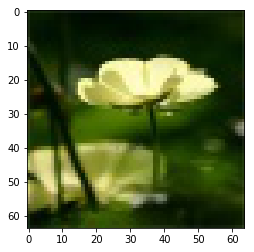

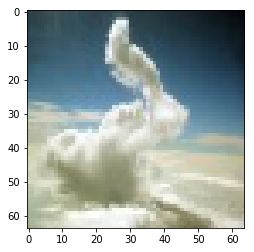

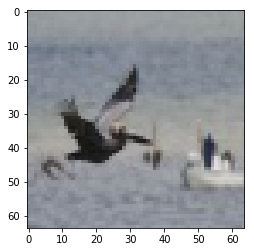

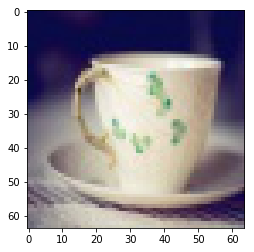

In [24]:
#affichage des 5 photos ayant le plus de correspondance 
path='C:/Users/ziedd/Desktop/Dammak_Zied/teb/cbir/thumbnails/thumbnails/'
for j in range(1,len(similar_picture)):
    if (j == 5): break
    second = similar_picture[j]["index"] % 10000
    first=int((similar_picture[j]["index"]-second)/10000)
    im=Image.open(path+str(first)+'/'+str(int(similar_picture[j]["index"]))+'.jpg')
    plt.imshow(im)
    plt.show()